### Paquetes utilizados

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import random
from sklearn.model_selection import train_test_split

### DataSet a utilizar.

In [3]:
data = np.load ('proyecto_training_data.npy')
print (data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


### Se convierte a un DataFrame para mejor manejo

In [4]:
dataset = pd.DataFrame(data, columns = ['SalesPrice','OverallQual','lstFirSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
dataset

,SalesPrice,OverallQual,lstFirSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Se separa en un 80% de entranamiento (entr) y un 20% prueba (prue)

In [5]:
entr = slice(0,1168,1)
prue = slice(1168,1460,1) 
ochenta = dataset[entr] 
veinte = dataset[prue]

### Analisis Exploratorio

#### Media por cada variable

In [49]:
media = np.mean(ochenta, 0)
media

SalesPrice      180590.277397
OverallQual          6.101027
lstFirSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64

#### Valor Maximo

In [50]:
np.amax(ochenta, 0)

SalesPrice      755000.0
OverallQual         10.0
lstFirSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64

#### Valor Minimo

In [51]:
np.amin(ochenta, 0)

SalesPrice      34900.0
OverallQual         1.0
lstFirSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64

#### Rango peak to peak

#### Desviación estándar

In [53]:
np.std(ochenta, 0)

SalesPrice      78781.951080
OverallQual         1.377435
lstFirSF          373.620332
TotRmsAbvGrd        1.608452
YearBuilt          29.938882
LotFrontage        23.465955
dtype: float64

### Histograma por Variable 

#### SalesPrice

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


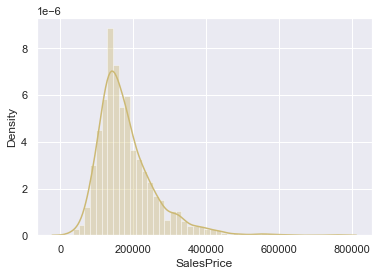

In [67]:
Sal = ochenta.iloc[:, 0]
sns.set_color_codes()
ax = sns.distplot(Sal, color="y")

#### OverallQual

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


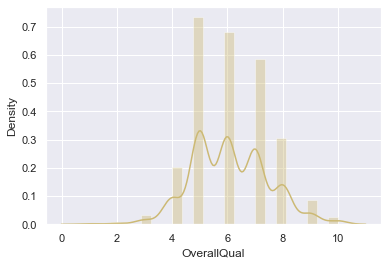

In [68]:
Ove = ochenta.iloc[:, 1]
sns.set_color_codes()
ax = sns.distplot(Ove, color="y")

#### lstFirSF

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


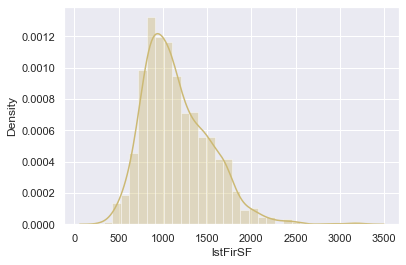

In [69]:
Ist = ochenta.iloc[:, 2]
sns.set_color_codes()
ax = sns.distplot(Ist, color="y")

#### TotRmsAbvGrd

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


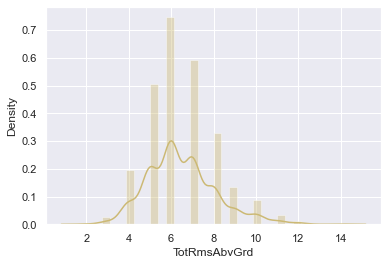

In [70]:
Ist = ochenta.iloc[:, 3]
sns.set_color_codes()
ax = sns.distplot(Ist, color="y")

#### YearBuilt

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


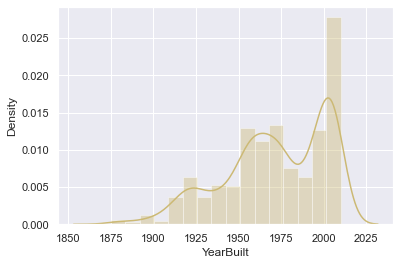

In [71]:
Year = ochenta.iloc[:, 4]
sns.set_color_codes()
ax = sns.distplot(Year, color="y")

#### LotFrontage

C:\Users\Julio Rodas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


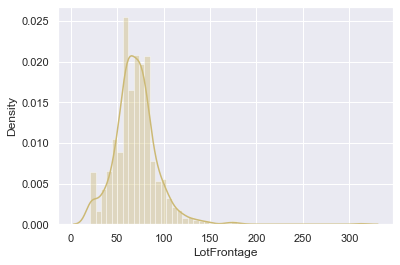

In [73]:
Lot = ochenta.iloc[:, 5]
sns.set_color_codes()
ax = sns.distplot(Lot, color="y")

In [9]:
conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\Julio



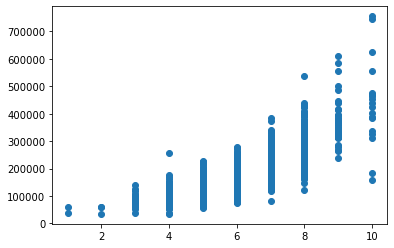

In [4]:
plt.scatter(dataset['OverallQual'],dataset['SalesPrice'])

In [7]:
x = dataset['OverallQual'].values.reshape(-1,1)
y = dataset['SalesPrice'].values.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
dataTrain,dataTest,dataTrain_Sales,dataTest_Sales = train_test_split(x,y,test_size=0.3, shuffle =True, random_state = 123)

In [16]:
from sklearn.linear_model import LinearRegression

lm_1 = LinearRegression ()
lm_1.fit(dataTrain,dataTrain_Sales)

LinearRegression()

In [18]:
lm_1.coef_

array([[44976.49429688]])

In [19]:
lm_1.intercept_

array([-94032.19372475])

In [20]:
Y_predict_from_train = lm_1.predict(dataTrain)

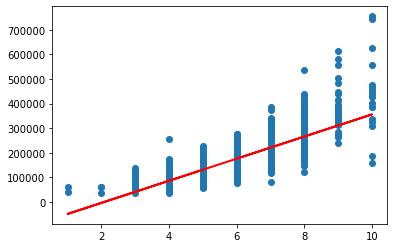

In [21]:
plt.scatter(dataset['OverallQual'],dataset['SalesPrice'])
plt.plot(dataTrain,Y_predict_from_train, color = 'red', linewidth = 2)
plt.show()

## R^2


In [23]:
lm_1.score(dataTrain,dataTrain_Sales)

0.6252097749070478

#### RMSE

In [25]:
from sklearn import metrics
import math
Y_predicts_test =lm_1.predict(dataTest)
rmse = math.sqrt(metrics.mean_squared_error(dataTest_Sales,Y_predicts_test))
rmse

46330.475917329764